In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import distributions
from classes.variables import Normal, Poisson
from classes.sampler import MHSampler, get_chain_parameters
# from classes.dpm import DPM

In [2]:
y = np.array([-0.12089986,  0.61515674,  0.56811393,  1.07073126,  1.23571253,
      -0.25292445,  0.87784138,  1.78100447,  0.3133824 ,  0.92270987])

In [3]:
np.mean(y), np.std(y)

(0.7010828270000001, 0.5856810423776603)

In [4]:
sampler = MHSampler(y, Normal())

In [5]:
sampler.sample(10000, burn_in=100, lag=10)

In [6]:
samples = get_chain_parameters(sampler._chain)

In [7]:
t_ = np.array(samples)

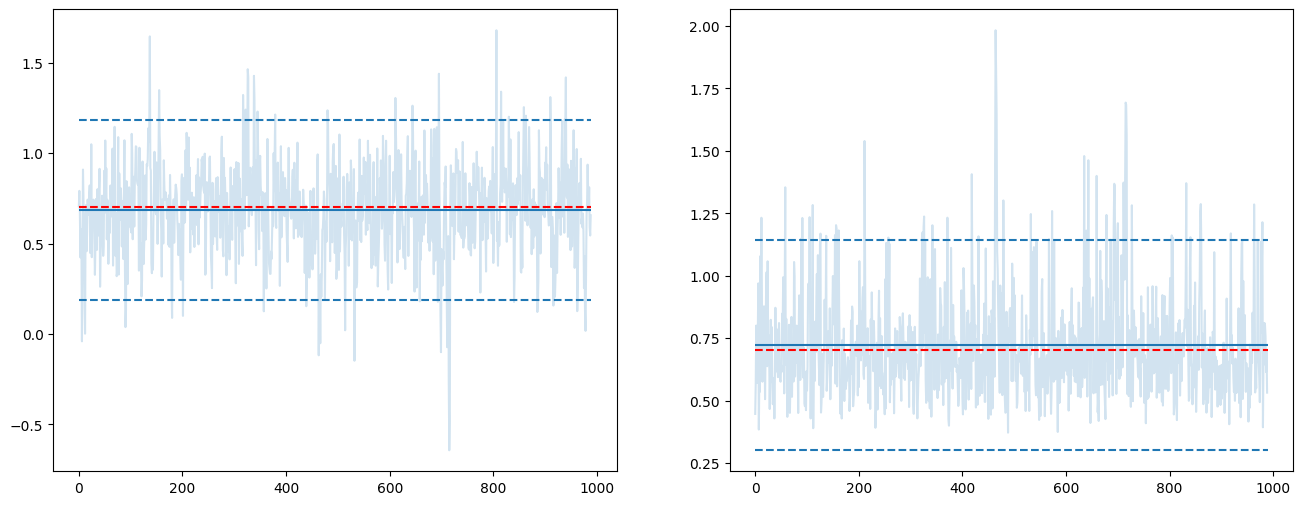

In [8]:
n_parameters = t_.shape[1]
fig, ax = plt.subplots(nrows=1, ncols=n_parameters, figsize=(n_parameters*8, 6))

for i in range(n_parameters):
    theta_chain = t_[:,i]
    ax[i].plot(theta_chain, alpha=0.2)
    ax[i].hlines([np.mean(theta_chain)], xmin=0, xmax=len(theta_chain))
    # ax[i].fill_between(x=[0, len(theta_chain)], y1=np.mean(theta_chain) + 1.96*np.std(theta_chain), y2=np.mean(theta_chain) - 1.96*np.std(theta_chain), alpha=0.2)
    ax[i].hlines(y=[np.mean(theta_chain) + 1.96*np.std(theta_chain), np.mean(theta_chain) - 1.96*np.std(theta_chain)], xmin=0, xmax=len(theta_chain), linestyles="dashed")

    ax[i].hlines([np.mean(y)], xmin=0, xmax=len(theta_chain), color="red", linestyles="dashed")



In [9]:
y = distributions.poisson.rvs(mu=3.8, size=100)
y = np.array([ 5,  8,  3,  1,  3,  6,  3,  4,  4,  2,  4,  5,  4,  5,  4,  2,  3,
        5,  5,  1,  9,  2,  4,  7,  4,  3,  6,  4,  1,  5,  3,  2,  3,  1,
        3,  3,  1, 11,  1,  6,  2,  4,  1,  3,  6,  5,  4,  3,  4,  3,  2,
        2,  4,  5,  7,  4,  1,  3,  2,  2,  6,  3,  4,  0,  5,  6,  3,  3,
        6,  6,  4,  1,  0,  4,  2,  1,  2,  1,  7,  1,  1,  5,  6,  4,  3,
        3,  5, 10,  3,  6,  3,  4,  6,  7,  1,  4,  6,  7,  8,  3])

In [10]:
variable = Poisson()
sampler = MHSampler(y, variable)

In [11]:
sampler.sample(10000)

In [12]:
samples = get_chain_parameters(sampler._chain)

In [13]:
t_ = np.array(samples)

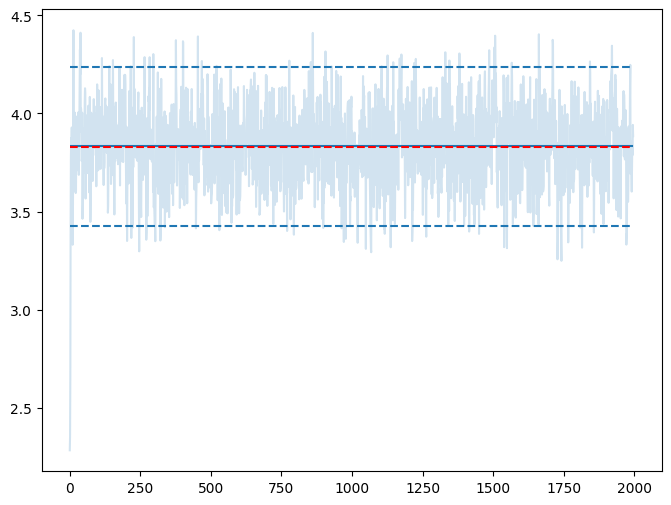

In [14]:
n_parameters = t_.shape[1]
fig, ax = plt.subplots(nrows=1, ncols=n_parameters, figsize=(n_parameters*8, 6))

for i in range(n_parameters):
    theta_chain = t_[:,i]
    ax.plot(theta_chain, alpha=0.2)
    ax.hlines([np.mean(theta_chain)], xmin=0, xmax=len(theta_chain))
    # ax[i].fill_between(x=[0, len(theta_chain)], y1=np.mean(theta_chain) + 1.96*np.std(theta_chain), y2=np.mean(theta_chain) - 1.96*np.std(theta_chain), alpha=0.2)
    ax.hlines(y=[np.mean(theta_chain) + 1.96*np.std(theta_chain), np.mean(theta_chain) - 1.96*np.std(theta_chain)], xmin=0, xmax=len(theta_chain), linestyles="dashed")

    ax.hlines([np.mean(y)], xmin=0, xmax=len(theta_chain), color="red", linestyles="dashed")

